In [1]:
#Importing dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import requests
import json

In [8]:
# Load the CSV file
csv_file_path = 'Resources/Fatalities_May2024.csv'

# Read the CSV file, specifying the header row
df_fatalities = pd.read_csv(csv_file_path, header=4, low_memory=False)

# Display the head of the DataFrame
df_fatalities.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20241101,NSW,5,2024,Friday,09:20,Single,No,No,Yes,...,40,Inner Regional Australia,Central West,Orange,Arterial Road,No,No,40_to_64,Weekday,Day
1,20243094,Qld,5,2024,Friday,14:00,Multiple,No,No,No,...,54,Inner Regional Australia,Darling Downs - Maranoa,Toowoomba,Sub-arterial Road,No,No,40_to_64,Weekday,Day
2,20244003,SA,5,2024,Friday,14:10,Single,No,No,No,...,63,NaN,NaN,NaN,NaN,No,No,40_to_64,Weekday,Day
3,20244003,SA,5,2024,Friday,14:10,Single,No,No,No,...,67,NaN,NaN,NaN,NaN,No,No,65_to_74,Weekday,Day
4,20241058,NSW,5,2024,Friday,15:30,Single,No,No,No,...,87,Major Cities of Australia,Sydney - Parramatta,Parramatta,Arterial Road,No,No,75_or_older,Weekday,Day


In [10]:
df_fatalities_clean = df_fatalities.copy()

In [12]:
# Removing the incomplete data for the year 2024
# Keeping only the data up to the most recent complete year, which is 2023
df_fatalities_clean = df_fatalities.loc[df_fatalities['Year'] != 2024]

# Displaying the cleaned DataFrame
df_fatalities_clean

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
538,20234021,SA,12,2023,Friday,01:42,Single,No,No,No,...,37,Major Cities of Australia,Adelaide - North,Salisbury,Collector Road,Yes,No,26_to_39,Weekday,Unknown
539,20234018,SA,12,2023,Friday,04:15,Single,No,No,No,...,37,Major Cities of Australia,Adelaide - North,Playford,Sub-arterial Road,No,No,26_to_39,Weekday,Unknown
540,20233014,Qld,12,2023,Friday,06:00,Multiple,No,No,Yes,...,43,Inner Regional Australia,Ipswich,Lockyer Valley,National or State Highway,No,No,40_to_64,Weekday,Day
541,20236025,Tas,12,2023,Friday,09:07,Multiple,No,No,No,...,42,Outer Regional Australia,West and North West,Waratah-Wynyard,National or State Highway,No,No,40_to_64,Weekday,Day
542,20233091,Qld,12,2023,Friday,12:00,Single,No,No,No,...,74,Outer Regional Australia,Darling Downs - Maranoa,Southern Downs,Collector Road,No,No,65_to_74,Weekday,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56120,19896006,Tas,1,1989,Wednesday,20:20,Multiple,No,-9,Yes,...,11,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Unknown
56121,19896006,Tas,1,1989,Wednesday,20:20,Multiple,No,-9,Yes,...,13,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Unknown
56122,19896006,Tas,1,1989,Wednesday,20:20,Multiple,No,-9,Yes,...,13,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Unknown
56123,19896006,Tas,1,1989,Wednesday,20:20,Multiple,No,-9,Yes,...,13,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Unknown


In [19]:
# Assuming df_fatalities_clean is the DataFrame with the cleaned data up to 2023
# Group by 'Year' and count the number of crashes
yearly_crashes = df_fatalities_clean.groupby('Year')['Crash ID'].count().reset_index()
yearly_crashes.rename(columns={'Crash ID': 'Total Crashes'}, inplace=True)

# Display the aggregated data
yearly_crashes


,Year,Total Crashes
0,1989,2800
1,1990,2331
2,1991,2113
3,1992,1974
4,1993,1953
5,1994,1928
6,1995,2017
7,1996,1970
8,1997,1767
9,1998,1755


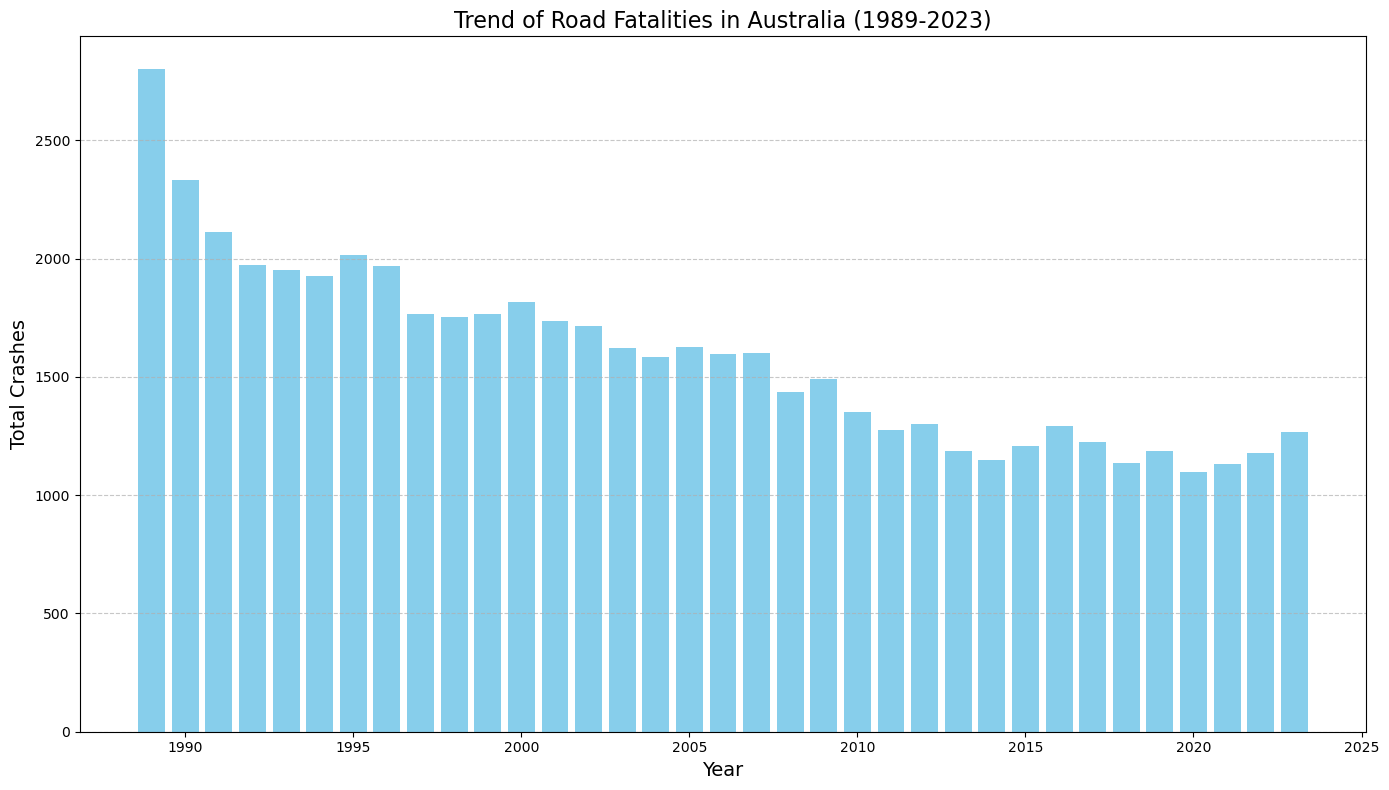

In [32]:
# Bar plot for yearly crashes
plt.figure(figsize=(14, 8))
plt.bar(yearly_crashes['Year'], yearly_crashes['Total Crashes'], color='skyblue')

plt.title("Trend of Road Fatalities in Australia (1989-2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Crashes", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('images/road_fatalities_trend_bar.png', bbox_inches='tight')

# Display the plot
plt.show()


In [28]:
# Aggregate the total number of crashes for each state and year
state_yearly_crashes = df_fatalities_clean.groupby(['State', 'Year'])['Crash ID'].count().unstack(fill_value = 0)

# Display the aggregated data
state_yearly_crashes


Year,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
State,,,,,,,,,,,,,,,,,,,,,
ACT,32,26,17,20,12,17,15,23,17,22,...,10,15,10,5,9,6,7,11,18,4
NSW,959,797,663,649,581,646,620,581,576,556,...,307,350,380,389,347,353,284,275,281,350
NT,61,68,67,54,44,41,61,72,60,69,...,39,49,45,31,50,36,31,35,47,31
Qld,428,399,395,416,396,418,456,385,360,279,...,223,243,251,247,245,219,278,277,297,276
SA,222,226,184,165,218,159,181,181,148,168,...,108,102,86,100,80,114,93,99,71,117
Tas,80,71,77,74,58,59,57,64,32,48,...,33,34,37,32,32,29,38,36,51,35
Vic,776,548,503,396,435,377,418,417,377,390,...,248,252,290,259,213,266,211,231,240,298
WA,242,196,207,200,209,211,209,247,197,223,...,182,161,195,160,159,163,155,166,175,158


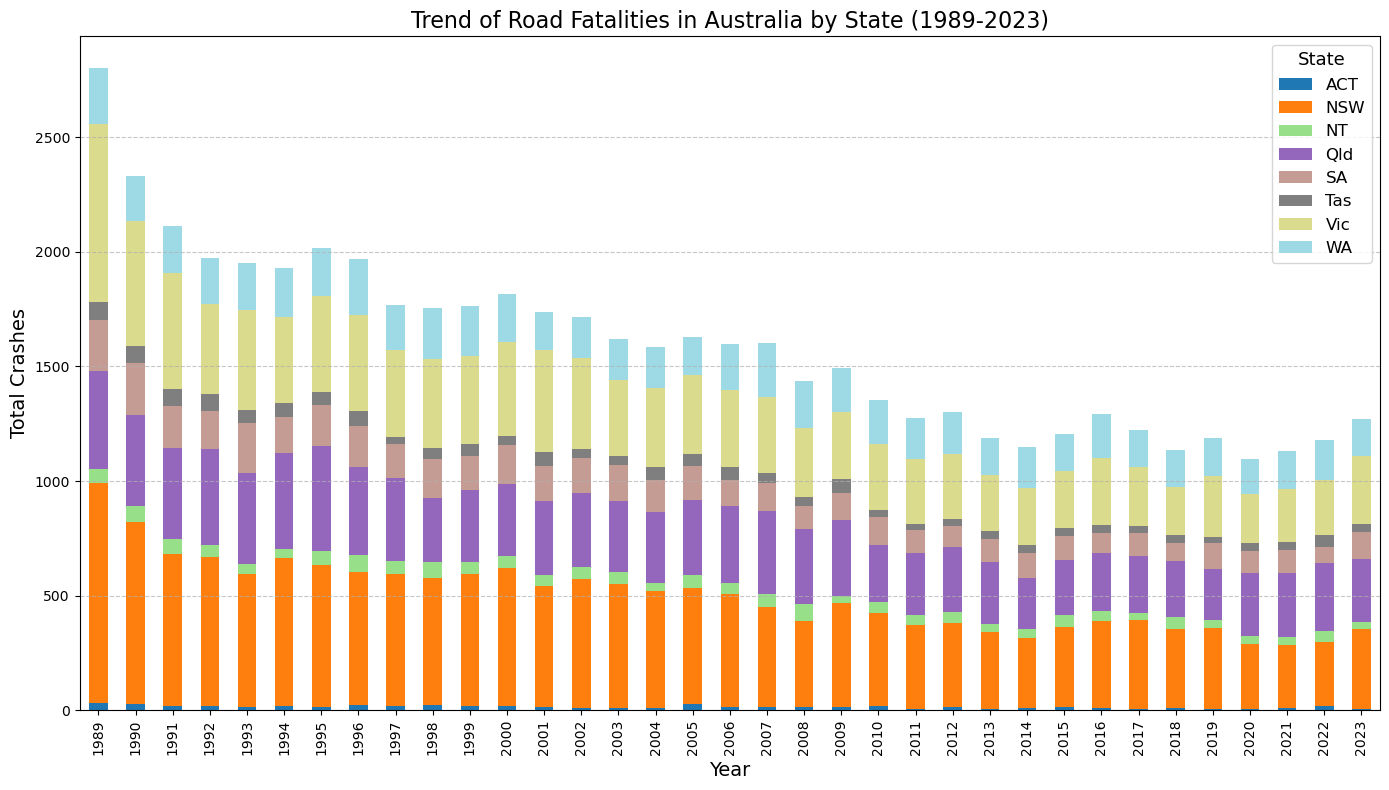

In [31]:
# Create a stacked bar plot for yearly crashes by state
ax = state_yearly_crashes.T.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Add a title to the plot
ax.set_title("Trend of Road Fatalities in Australia by State (1989-2023)", fontsize=16)

# Add labels to the x and y axes
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Total Crashes", fontsize=14)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend to the plot, positioned outside the plot area
plt.legend(title='State', title_fontsize='13', bbox_to_anchor=(1.0, 1.0), loc="best", fontsize=12)

# Adjust layout to make room for the legend
plt.tight_layout()

# Save the plot as an image file (optional)
# plt.savefig('/mnt/data/road_fatalities_by_state_trend.png', bbox_inches='tight')

# Display the plot
plt.show()


In [13]:
# Function to get data by year
def get_by_year(df, year):
    return df.loc[df['Year'] == year]

# Create a dictionary to hold DataFrames for each year
years_data = {}
for year in range(1989, 2024):
    years_data[year] = get_by_year(df_fatalities_clean, year)

# Initialize the DataFrame for total crashes by state for all 35 years
df_35years_state_crashes = pd.DataFrame({'State': ['ACT', 'NSW', 'NT', 'Qld', 'SA', 'Tas', 'Vic', 'WA']})

# Function to get crashes by state for a given DataFrame and year
def get_crash_by_state(df, year):
    temp = df.groupby('State')[['Crash ID']].count().reset_index()
    temp.rename(columns={'Crash ID': f'Crash_{year}'}, inplace=True)
    global df_35years_state_crashes
    df_35years_state_crashes = pd.merge(df_35years_state_crashes, temp, on='State', how='left')
    return df_35years_state_crashes

# Loop through each year's DataFrame and update the total crashes DataFrame
for year, data in years_data.items():
    get_crash_by_state(data, year)

# Display the final DataFrame
df_35years_state_crashes

,State,Crash_1989,Crash_1990,Crash_1991,Crash_1992,Crash_1993,Crash_1994,Crash_1995,Crash_1996,Crash_1997,...,Crash_2014,Crash_2015,Crash_2016,Crash_2017,Crash_2018,Crash_2019,Crash_2020,Crash_2021,Crash_2022,Crash_2023
0,ACT,32,26,17,20,12,17,15,23,17,...,10,15,10,5,9,6,7,11,18,4
1,NSW,959,797,663,649,581,646,620,581,576,...,307,350,380,389,347,353,284,275,281,350
2,NT,61,68,67,54,44,41,61,72,60,...,39,49,45,31,50,36,31,35,47,31
3,Qld,428,399,395,416,396,418,456,385,360,...,223,243,251,247,245,219,278,277,297,276
4,SA,222,226,184,165,218,159,181,181,148,...,108,102,86,100,80,114,93,99,71,117
5,Tas,80,71,77,74,58,59,57,64,32,...,33,34,37,32,32,29,38,36,51,35
6,Vic,776,548,503,396,435,377,418,417,377,...,248,252,290,259,213,266,211,231,240,298
7,WA,242,196,207,200,209,211,209,247,197,...,182,161,195,160,159,163,155,166,175,158


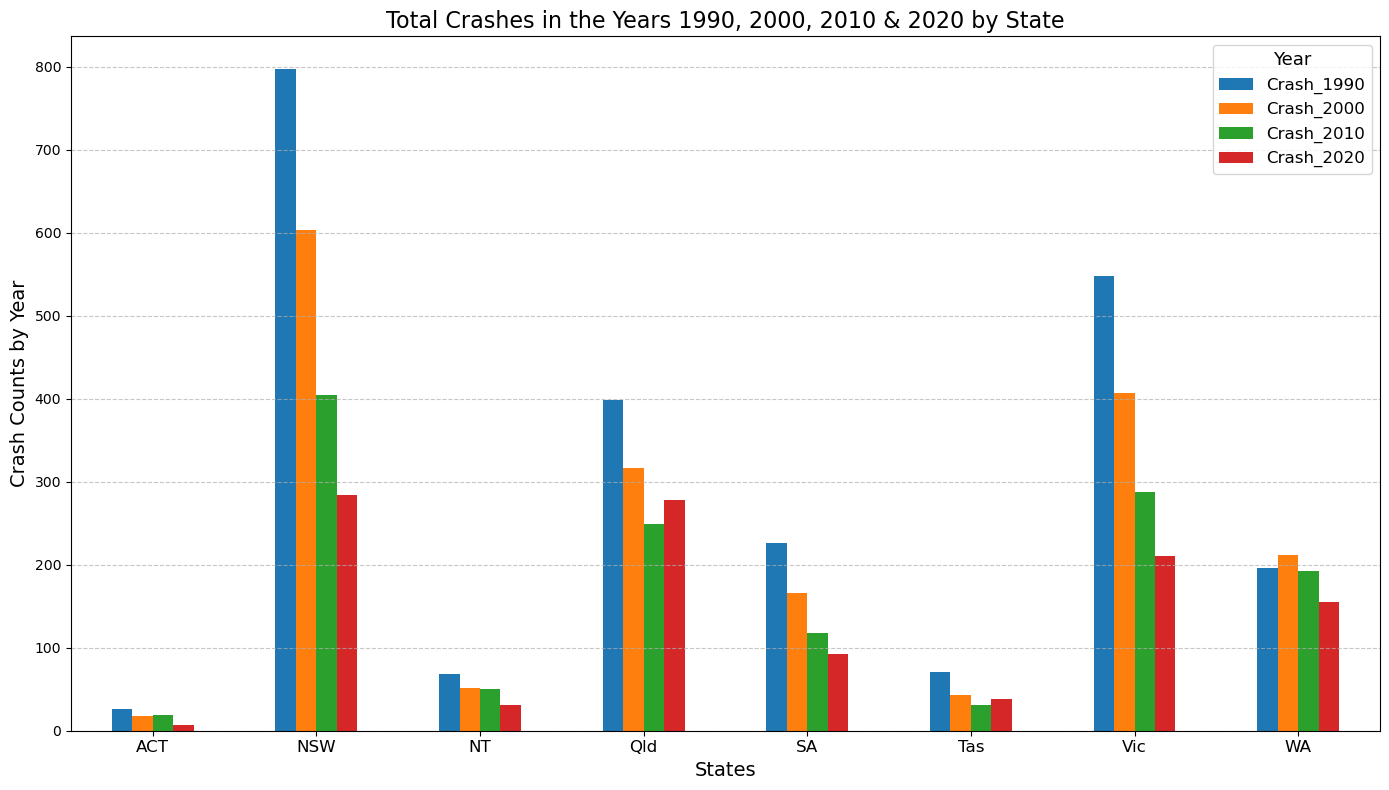

In [23]:
# Plot the total crashes for the years 1990, 2000, 2010, and 2020 by state
ax = df_35years_state_crashes.plot(
    x="State",
    y=['Crash_1990', 'Crash_2000', 'Crash_2010', 'Crash_2020'],
    kind='bar',
    figsize=(14, 8),
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
)

# Add a title to the plot
ax.set_title("Total Crashes in the Years 1990, 2000, 2010 & 2020 by State", fontsize=16)

# Add labels to the x and y axes
ax.set_xlabel("States", fontsize=14)
ax.set_ylabel("Crash Counts by Year", fontsize=14)

# Rotate x-axis labels to be horizontal
plt.xticks(rotation=0, fontsize=12)

# Add a legend to the plot, positioned outside the plot area
plt.legend(
    title='Year',
    title_fontsize='13',
    bbox_to_anchor=(1.0, 1.0),
    loc="best",
    fontsize=12
)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to make room for the legend
plt.tight_layout()

# Save the plot as an image file
plt.savefig('images/total_crashes_by_state_per_10_years.png', bbox_inches='tight')

# Display the plot
plt.show()